After doing Tweet collection with the Tweepy API, we used this vader Sentiment Analysis to investigate his sentiment based on Positive, Neutral, Negative

In [1]:
import pandas as pd
import numpy as np
import textblob
from textblob import TextBlob
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
trump_df = pd.read_csv("realDonaldTrump_tweets.csv")

In [3]:
#removes the 'b' infront of the tweets that indicate byte format
trump_df.text = trump_df.text.str.lstrip("b'")

In [4]:
#Saving that into a new csv
trump_df.to_csv("test.csv", index=False, encoding="utf-8")

In [5]:
#Checking the new csv
pd.read_csv("test.csv", encoding="utf-8").head()

,Unnamed: 0,id,created_at,text
0,0,1019545713435467776,2018-07-18 11:33:34,3.4 million jobs created since our great Elect...
1,1,1019544304853966853,2018-07-18 11:27:59,Some people HATE the fact that I got along wel...
2,2,1019538038651871233,2018-07-18 11:03:05,\xe2\x80\x9cA lot of Democrats wished they vot...
3,3,1019533312052858880,2018-07-18 10:44:18,Congratulations to Martha Roby of The Great St...
4,4,1019526399542091776,2018-07-18 10:16:50,....Russia has agreed to help with North Korea...


In [6]:
trump_df= trump_df.drop(columns=['Unnamed: 0'])
trump_df.head()

,id,created_at,text
0,1019545713435467776,2018-07-18 11:33:34,3.4 million jobs created since our great Elect...
1,1019544304853966853,2018-07-18 11:27:59,Some people HATE the fact that I got along wel...
2,1019538038651871233,2018-07-18 11:03:05,\xe2\x80\x9cA lot of Democrats wished they vot...
3,1019533312052858880,2018-07-18 10:44:18,Congratulations to Martha Roby of The Great St...
4,1019526399542091776,2018-07-18 10:16:50,....Russia has agreed to help with North Korea...


In [7]:
trump_df.dtypes

id             int64
created_at    object
text          object
dtype: object

Sentiment analysis, mainly based on the English words he types. Try and format the text into ASCII format. 

In [8]:
#Try and clean the tweet text? Just keep the ascii- letter characters
def clean_tweet(text):
    """Function to clean the text of a tweet by removing links and special characters using regex"""
    return ''.join(re.sub("(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)", " ", text)) 

In [9]:
#Try and access each tweet content, and clean it up
for tweet in trump_df.text:
    clean_tweet(tweet)

In [10]:
# New single columned data frame
new_trump_df = trump_df.text.apply(clean_tweet)

In [11]:
#only contains the clean text as a column
new_trump_df.head(10)

0        million jobs created since our great Elect...
1    Some people HATE the fact that I got along wel...
2     xe  x   x cA lot of Democrats wished they vot...
3    Congratulations to Martha Roby of The Great St...
4        Russia has agreed to help with North Korea...
5    While the NATO meeting in Brussels was an ackn...
6    So many people at the higher ends of intellige...
7     xe  x   x cProsperity is returning  Donald Tr...
8    The Democrats want to abolish ICE  which will ...
9    The meeting between President Putin and myself...
Name: text, dtype: object

In [12]:
#replacing the old data frame's text with the new text
trump_df['text'] = new_trump_df

In [13]:
trump_df.head(3)

,id,created_at,text
0,1019545713435467776,2018-07-18 11:33:34,million jobs created since our great Elect...
1,1019544304853966853,2018-07-18 11:27:59,Some people HATE the fact that I got along wel...
2,1019538038651871233,2018-07-18 11:03:05,xe x x cA lot of Democrats wished they vot...


In [14]:
tweet = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []
for i in range(0,len(trump_df)):
    tweet.append(trump_df['text'][i])
    vs_compound.append(analyzer.polarity_scores(trump_df['text'][i])['compound'])
    vs_pos.append(analyzer.polarity_scores(trump_df['text'][i])['pos'])
    vs_neu.append(analyzer.polarity_scores(trump_df['text'][i])['neu'])
    vs_neg.append(analyzer.polarity_scores(trump_df['text'][i])['neg'])
    twitter_df = pd.DataFrame({'Tweet': tweet,
    'Compound': vs_compound,
    'Positive': vs_pos,
    'Neutral': vs_neu,
    'Negative':vs_neg})
    twitter_df = twitter_df[['Tweet','Compound','Positive','Neutral','Negative']]
    
twitter_df.head()


,Tweet,Compound,Positive,Neutral,Negative
0,million jobs created since our great Elect...,0.8225,0.350,0.650,0.000
1,Some people HATE the fact that I got along wel...,-0.8038,0.067,0.668,0.265
2,xe x x cA lot of Democrats wished they vot...,0.1027,0.097,0.821,0.082
3,Congratulations to Martha Roby of The Great St...,0.9153,0.383,0.617,0.000
4,Russia has agreed to help with North Korea...,0.7902,0.296,0.704,0.000


In [15]:
positive_tweets=0
negative_tweets=0
neutral_tweets=0
for i in range(len(twitter_df)):
    if(twitter_df['Compound'][i]>0.5):
        positive_tweets+=1
    elif(twitter_df['Compound'][i]<0):
        negative_tweets+=1
    else:
        neutral_tweets+=1


In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
 
graph_df=pd.DataFrame(columns=['type','sentiment frequency'])
tweet_dictionary={'Positive':positive_tweets,'Negative':negative_tweets,'Neutral':neutral_tweets}
graph_df=pd.DataFrame.from_dict(tweet_dictionary,orient='index')
graph_df.head()

,0
Positive,1801
Negative,936
Neutral,498


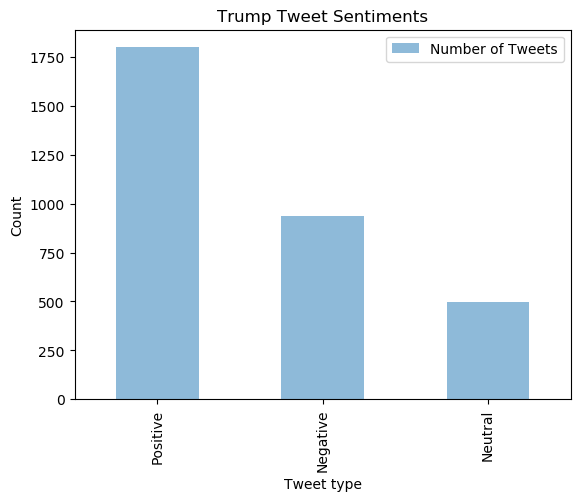

,Number of Tweets
Positive,1801
Negative,936
Neutral,498


In [23]:
graph_df=graph_df.rename(columns={0:'Number of Tweets'})
graph_df.plot.bar(alpha=0.5)
plt.xlabel('Tweet type')
plt.ylabel('Count')
plt.title('Trump Tweet Sentiments')
plt.show()
graph_df.head()

In [19]:
percentpositive= graph_df['Number of Tweets'][0]/graph_df['Number of Tweets'].sum()
percentpositive

percentnegative=graph_df['Number of Tweets'][1]/graph_df['Number of Tweets'].sum()

percentneutral=graph_df['Number of Tweets'][2]/graph_df['Number of Tweets'].sum()

In [27]:
print('Percentage positive tweets:{}'.format(round(percentpositive,3)))
print('Percentage negative tweets:{}'.format(round(percentnegative,3)))
print('Percentage neutral tweets:{}'.format(round(percentneutral,3)))

Percentage positive tweets:0.557
Percentage negative tweets:0.289
Percentage neutral tweets:0.154


In [ ]:
trump_df.to_json('trump_data.json')